In [21]:
from pylab import*
%matplotlib inline

In [22]:
def RK4(ec, p_ini, x, args=0, h=0.01):
    if (x[1]-x[0]) <= 5*h:
        h = (x[1]-x[0])/10
    tiempos=arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i])
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    else:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i],args)
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h,args)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h,args)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h,args)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    return tiempos,sol

In [71]:
def e_mov(r_v,t,fric=0,g= 9.8,m=1,alfa=pi/4):
    u =sqrt(r_v[2]**2+r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric==0:
        dvx,dvy = (g/m)*sin(alfa),-(g/m)*cos(alfa)
        #print "No use un modelo de friccion"
    else:
        dvx = (g/m)*sin(alfa) - fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m)*cos(alfa) - fric([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])

In [72]:
def fric_id(v):
    return array([0,0])

def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y = gamma*norm_v*v[1]
    return array([f_x,f_y])

In [73]:
def rebote(r_v_i,mi_dt):
    dt_busqueda = mi_dt/2
    y_izq=r_v_i
    t,sol = RK4(e_mov,r_v_i,[0,dt_busqueda],fric_v)
    ymed = sol[-1,:]
    while abs(y_izq[1]) > 1e-5:
        if y_izq[1]*ymed[1] < 0:
            reinicio = y_izq
        else:
            reinicio = ymed
        dt_busqueda = dt_busqueda/2
        t,sol = RK4(e_mov,reinicio,[0,dt_busqueda],fric_v)
        y_izq = reinicio
        ymed = sol[-1,:]
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

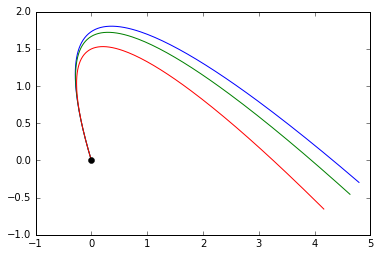

In [124]:
p=[0,0,-2,5]
t,sol_id=RK4(e_mov,p,[0,1.5])
t,sol_fv=RK4(e_mov,p,[0,1.5],fric_v)
t,sol_fv2=RK4(e_mov,p,[0,1.5],fric_v2)
plot(sol_id[:,0],sol_id[:,1])
plot(sol_fv[:,0],sol_fv[:,1])
plot(sol_fv2[:,0],sol_fv2[:,1])
plot(sol_id[0,0],sol_id[0,1],'ko')

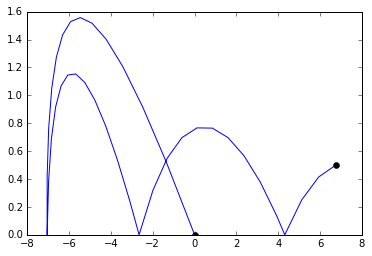

In [132]:
inicio=[0,0,-15,6]
N=40
trayectoria=zeros((N,len(inicio)))
mi_dt=0.1
trayectoria[0,:] = array(inicio)
for i in range(N-1):
    t,sol_dt=RK4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v2)
    if sol_dt[-1,:][1] < 0:
        punto=rebote(trayectoria[i,:],mi_dt)
        trayectoria[i+1,:]=punto
    else:
        trayectoria[i+1] = sol_dt[-1,:]
x=trayectoria[:,0]*cos(pi/4)+trayectoria[:,1]*sin(pi/4)
y=-trayectoria[:,0]*sin(pi/4)+trayectoria[:,1]*cos(pi/4)
plot(trayectoria[:,0],trayectoria[:,1],'-')
plot([trayectoria[0,0],trayectoria[-1,0]],[trayectoria[0,1],trayectoria[-1,1]],'ko')
#plot([x[0],x[-1]],[y[0],y[-1]],'ko')
#plot(linspace(-10,10),-linspace(-10,10))
show()

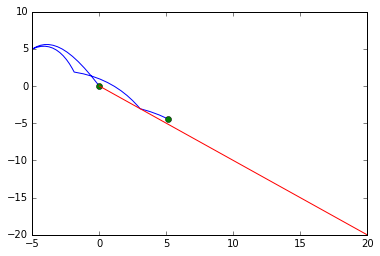

In [133]:
plot(x,y)
plot([x[0],x[-1]],[y[0],y[-1]],'o')
plot([0,20],[0,-20])

In [28]:
print e_mov([1,1,1,1],1)
print e_mov([1,1,1,1],1,fric_id)
print e_mov([1,1,1,1],1,fric_v)
print e_mov([1,1,1,1],1,fric_v2)

[ 1.          1.         -6.92964646  6.92964646]
[ 1.          1.         -6.92964646  6.92964646]
[ 1.          1.         -7.02964646  6.82964646]
[ 1.          1.         -7.07106781  6.7882251 ]


In [29]:
print sol_fv2[80,:][1]
print sol_fv2[-1,:][1]

4.98024977445
6.44982292672
